<a href="https://colab.research.google.com/github/Tal144155/DTS_Project/blob/main/TDS_Project_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabular Data Science - Research Project
### Group Members: 
* Tal Ariel Ziv
* Arnon Lutsky

#### Introduction
Our final project aims to enhance and automate the data visualization process within the data science pipeline. Visualization is a critical step in understanding the data, allowing users to explore distributions, analyze relationships between features and target variables, and gain meaningful insights from different perspectives. By improving and automating this process, we seek to make data exploration more efficient, more intuitive, and accessible. Our solution is an algorithm that automatically analyzes the data for different statistical relations and interesting observations and recommends visualizations based on analysis and a recommendation system.<br>

Before we begin, let's install all packages that are needed to run the notebook.
#### Installation Guide:
1. Download python **version 3.12** (and up). You can use the following [link](https://www.python.org/downloads/).
2. Please download all required packages, using the following command (write it in your CMD): `pip install -r requirements.txt`<br><br>
<font size=4px>**Now, we are able to begin.**</font>

### Relation Detection Algorithm:

For deeper understanding of the relation detection algorithm, please refer to the pdf with the full explanation of the project, under Relation Detection Algorithm, section 2.1 .

Now, lets start analyzing the data.

### 0. Imports

In [3]:
import pandas as pd
import numpy as np
import os.path
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from plot_generator import *
from recommendation_tool import *
from relation_detection_algorithm import *
import warnings
warnings.filterwarnings('ignore')


### 1. Uploading The Data And Ratings
Now, let's define the functions that will find the relations. For this, we will be using the relation detection algorithm. The algorithm will find all relations possible in the dataset, and will return a dictionary containing those relation with important information on each one.

We'll set the top 10 relations as the default number of relations returned.

In [2]:
TOP_N_RELATIONS = 10

Now we'll run the relation detection algorithm. We'll load a dataset, this will be the movie dataset on which we worked on the last parts. The read data method was created withing the relation detection algorithm.

In [ ]:
dataset_path = "Datasets_Testing/movie_new.csv"

# This method has been taken from the Relation Detection Algorithm.
df = read_data(dataset_path)

- Loading the dataset.
Converted column 'release_date' to datetime.


We'll load the existing user ratings. In order to do that, we need to define all the relation possible in our dataset, and general information about each one.

In [ ]:
RELATION_TYPES = {
    "high_correlation": {
        "description": "Identifies pairs of numerical features that have a strong linear relationship, indicating potential multicollinearity or redundancy in the dataset.",
        "use_cases": [
            "Feature selection",
            "Dimensionality reduction",
            "Understanding feature interactions"
        ],
        "data_types": ["numerical"],
        "dimensions": [2],
    },
    'target_correlation': {
        "description": "Measures the linear relationship between individual features and the target variable, helping to identify the most influential predictors.",
        "use_cases": [
            "Feature importance ranking",
            "Predictive modeling",
            "Feature selection"
        ],
        "data_types": ["numerical"],
        "dimensions": [2],
    },
    'categorical_effect': {
        "description": "Evaluates the statistical significance of categorical variables' impact on a numerical target variable using one-way ANOVA test.",
        "use_cases": [
            "Feature significance testing",
            "Group comparison",
            "Categorical feature importance"
        ],
        "data_types": ["categorical", "numerical"],
        "dimensions": [2],
    },
    'chi_squared': {
        "description": "Identifies statistically significant relationships between categorical variables using the chi-squared independence test.",
        "use_cases": [
            "Feature dependency analysis",
            "Categorical variable interaction detection",
            "Feature selection"
        ],
        "data_types": ["categorical"],
        "dimensions": [2],
    },
    'date_numerical_trend': {
        "description": "Detects temporal trends in numerical features by measuring their correlation with time-based attributes.",
        "use_cases": [
            "Time series analysis",
            "Trend identification",
            "Temporal pattern recognition"
        ],
        "data_types": ["numerical", "time series"],
        "dimensions": [2],
    },
    'date_categorical_distribution': {
        "description": "Analyzes how categorical variable distributions change or are distributed across different time periods.",
        "use_cases": [
            "Temporal categorical pattern detection",
            "Seasonal variation analysis",
            "Time-based segmentation"
        ],
        "data_types": ["categorical", "time series"],
        "dimensions": [2],
    },
    'non_linear': {
        "description": "Identifies complex, non-linear relationships between numerical features using mutual information score.",
        "use_cases": [
            "Advanced feature interaction detection",
            "Non-linear dependency analysis",
            "Complex relationship mapping"
        ],
        "data_types": ["numerical"],
        "dimensions": [2],
    },
    'feature_importance': {
        "description": "Ranks features based on their predictive power using a Random Forest Regressor's feature importance metric.",
        "use_cases": [
            "Predictive modeling",
            "Feature selection",
            "Model interpretability"
        ],
        "data_types": ["numerical"],
        "dimensions": [2],
    },
    'outlier_pattern': {
        "description": "Detects unique correlation patterns among outliers that differ from the overall dataset's correlations.",
        "use_cases": [
            "Anomaly detection",
            "Robust correlation analysis",
            "Outlier impact assessment"
        ],
        "data_types": ["numerical"],
        "dimensions": [2],
    },
    'target_analysis': {
        "description": "Provides a comprehensive analysis of the target variable, including outlier characteristics and distribution properties.",
        "use_cases": [
            "Target variable understanding",
            "Distribution fitting",
            "Outlier detection"
        ],
        "data_types": ["numerical"],
        "dimensions": [1],
    }
}

After defining the most important relations, we are ready to load the user ratings. We will use those ratings in order to give the user better visualizations the he might like, based on other users ratings.

In [ ]:
# This method has been taken from the Recommendation System.
ratings = load_ratings('user_ratings', RELATION_TYPES)

<bound method NDFrame.head of Empty DataFrame
Columns: [high_correlation, target_correlation, categorical_effect, chi_squared, date_numerical_trend, date_categorical_distribution, non_linear, feature_importance, outlier_pattern, target_analysis]
Index: []>

### 2. Running Example
Now, we would like to present a full running example of our system.
As se said before, the running example will be on the movies dataset that we used previously in other parts of the project.


The system works like this:

* First, you need to insert your user id. If the user does not exist in the system, we will create a new row in the dataset for the new user.
* Then, the **Relation Detection Algorithm** will run and identify the relations in the data.
* After that, the data is being processed by the **Recommendation System**, finding the most suitable visualization for the user.
* Finally, the relation chosen is being visualized using the **Plot Generator**.

**Let's start with the process:**


To begin, please enter a user id (if this is a new user we'll add it to the file)

In [ ]:
user_id = input("Please enter a user id:\n")

# If this is a new user, add the user to the dataframe.
if not user_id in ratings.index:
    ratings.loc[user_id] = np.nan
    save_ratings(ratings, 'user_ratings')

The target variable we want to predict is the revenue. This is important information that is used in our automation, therefore must be declared.

In [7]:
target_value = "revenue"

Let's begin the second part, using the **Relation detection algorithm** to detect different patters in the data. First, our algorithm needs to know the different types of features in the data. Then, using this information we extract all important relations.

In [ ]:
# Get automatic recommendations 
dataset_types = get_column_types(df)
algo_rec = find_relations(df, target_value, dataset_types)

- Finding features types in the dataset.
- Checking for correlation.
- Checking for correlation with the target variable.
- Checking for categorical effect.
- Checking for chi square relation.
- Checking for date with numerical variables.
- Checking for date with categorical variable.
- Checking for non linear relation.
- Checking for feature importance.
- Checking for outliers relation.
- Checking for target variable.


The above printing is from the **Relation Detection Algorithm**, adding notes showing it's progress. 

Now, after the algorithm finished it's run, the **Recommendation System** takes it's turn. The system goes over all the relations found, and giving each relation a score, a prediction for will the user is going to like this relation.

In [ ]:
algo_rec = get_relation_scores(algo_rec)
plot_index = 0

Now, it's time to run the process. each time, the system chooses a different relation from the relations found, the relation with the highest score given by the **Recommendation System**.

Then the selected relation is being plotted by the **Plot Generator**. Finally, the system asks the user to insert the rating for this score, and the process continues.

So, in the following code section you are going to see this process. After that, you can see all the visualizations (the best ones) chosen by the system.

**It is important to note that this code was taken from the research system. The research system takes all the automation we wrote, and integrated them into one tool. The process of creating the visualization is automated, and happens within the research.**

Saved plot: plots\plot_0.png


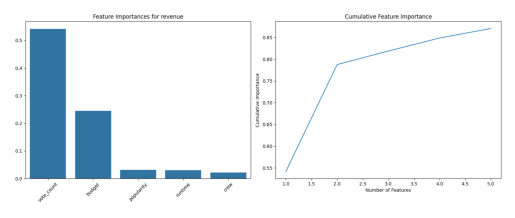

Saved plot: plots\plot_1.png


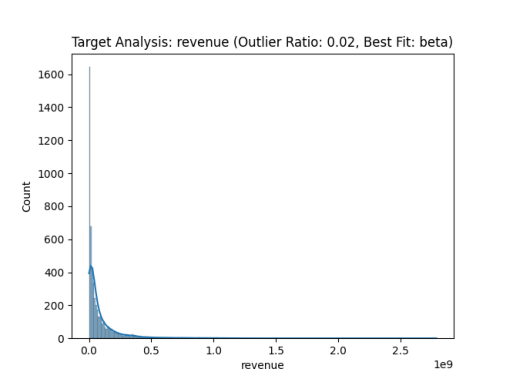

Saved plot: plots\plot_2.png


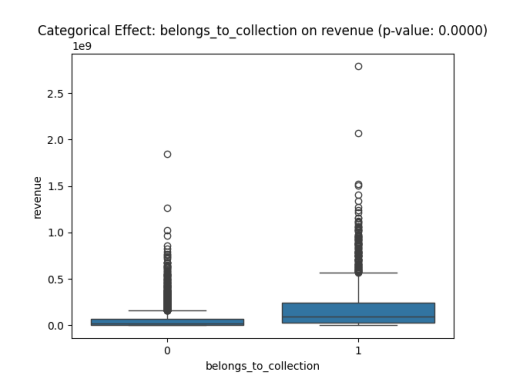

Saved plot: plots\plot_3.png


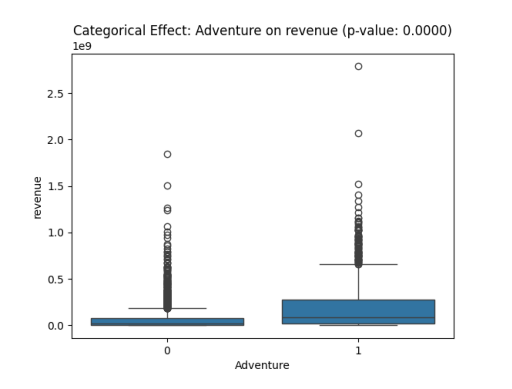

Saved plot: plots\plot_4.png


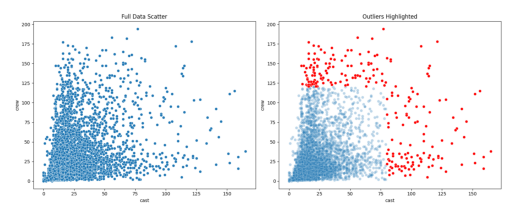

Saved plot: plots\plot_5.png


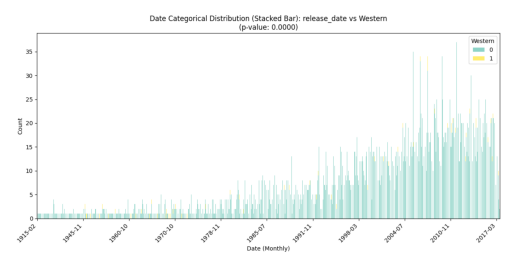

In [ ]:
while (plot_index < 6):
    if algo_rec:
            # get the most wanted visualization by the user
            combined_user_vis_pred = combine_pred(CFIB(ratings), CFUB(ratings), 0.5, 0.5)
            algo_rec_df = get_top_relations(algo_rec)
            user_index = ratings.index.get_loc(user_id)
            recommendations = combine_pred(combined_user_vis_pred[user_index], algo_rec_df.to_numpy()[0], 0.7, 0.3)
            index = int(algo_rec_df.iloc[1,recommendations.argmax()])
            chosen_plot = algo_rec.pop(index)
            plot_save_name = f'plot_{plot_index}'
            # Based on the relation, call the correct method from the Plot Generator
            if chosen_plot['relation_type'] == "high_correlation":
                plot_high_correlation(df, chosen_plot["attributes"][0], chosen_plot["attributes"][1], chosen_plot["details"]["correlation_value"], plot_save_name)
            elif chosen_plot['relation_type'] == "target_correlation":
                plot_target_correlation(df, chosen_plot["attributes"][0], chosen_plot["attributes"][1], chosen_plot["details"]["correlation_value"], plot_save_name)
            elif chosen_plot['relation_type'] == "categorical_effect":
                plot_categorical_effect(df, chosen_plot["attributes"][0], chosen_plot["attributes"][1], chosen_plot["details"]["p_value"], plot_save_name)
            elif chosen_plot['relation_type'] == "chi_squared":
                plot_chi_squared(df, chosen_plot["attributes"][0], chosen_plot["attributes"][1], chosen_plot["details"]["p_value"], plot_save_name)
            elif chosen_plot['relation_type'] == "date_numerical_trend":
                plot_date_numerical_trend(df, chosen_plot["attributes"][0], chosen_plot["attributes"][1], chosen_plot["details"]["correlation_value"], plot_save_name)
            elif chosen_plot['relation_type'] == "date_categorical_distribution":
                plot_date_categorical_distribution(df, chosen_plot["attributes"][0], chosen_plot["attributes"][1], chosen_plot["details"]["p_value"], plot_save_name)
            elif chosen_plot['relation_type'] == "non_linear":
                plot_non_linear(df, chosen_plot["attributes"][0], chosen_plot["attributes"][1], chosen_plot["details"]["mutual_information"], plot_save_name)
            elif chosen_plot['relation_type'] == "feature_importance":
                plot_feature_importance(df, chosen_plot["details"]["importances"], chosen_plot["details"]["target_variable"], plot_save_name)
            elif chosen_plot['relation_type'] == "outlier_pattern":
                plot_outlier_pattern(df, chosen_plot["attributes"][0], chosen_plot["attributes"][1], plot_save_name)
            elif chosen_plot['relation_type'] == "target_analysis":
                plot_target_analysis(df, chosen_plot["attributes"][0], chosen_plot["details"]["outlier_ratio"], chosen_plot["details"]["distribution_type"], plot_save_name)

            image_path = os.path.abspath(os.path.join(PLOTS_DIR, f'{plot_save_name}.png'))


    img = mpimg.imread(image_path)
    # Showing the image in the notebook
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    new_rating = 0
    # receiving rating from the user and updating accordingly
    while new_rating > 5 or new_rating < 1:
        new_rating = int(input('please enter a rating between 1 (least helpfull) and 5 (most helpfull)')) 
    user_rating = 0
    if pd.notna(ratings.loc[user_id, chosen_plot['relation_type']]):
        user_rating = ratings.loc[user_id, chosen_plot['relation_type']]
    if user_rating:
        ratings.loc[user_id, chosen_plot['relation_type']] = user_rating * 0.5 + new_rating* 0.5
    else:
        ratings.loc[user_id, chosen_plot['relation_type']] = new_rating

    save_ratings(ratings, 'user_ratings')   
    plot_index+=1 
    ratings = load_ratings('user_ratings', RELATION_TYPES)


The system recommended useful visualizations, including the most impactful features for predicting revenue, which is the target variable. Additionally, it suggested a distribution plot of `revenue`, an analysis of `crew` and `cast` with outliers, box plots highlighting statistically significant differences (low p-values), and a temporal trend chart showing changes in the number of `Western` movies.